# Task 1 
## Implementing Linear Search and Binary Search 

Linear Search Times: [0.0, 0.0, 0.0009968280792236328]
Binary Search Times: [0.0, 0.0, 0.0]


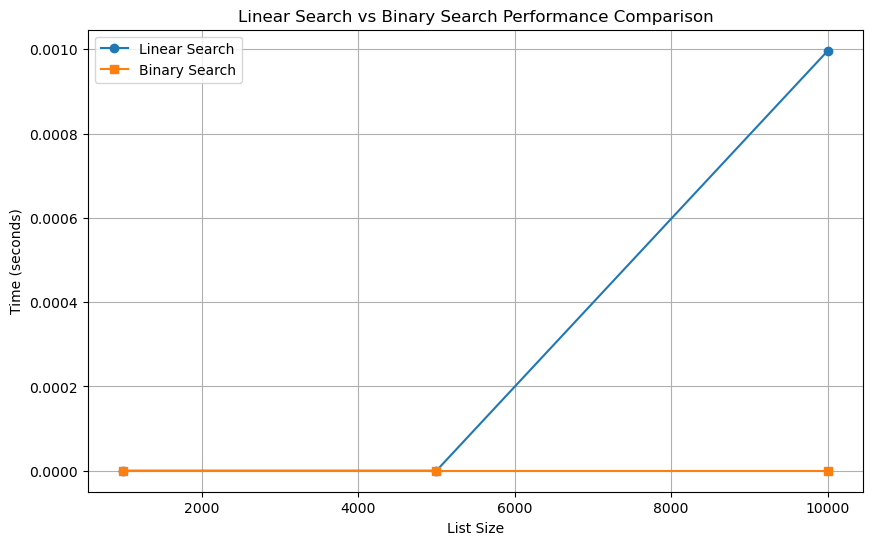

In [1]:
import time
import random
import matplotlib.pyplot as plt

def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

def measure_time(search_func, arr, target):
    start_time = time.time()
    search_func(arr, target)
    return time.time() - start_time

list_sizes = [1000, 5000, 10000]

linear_times = []
binary_times = []

for size in list_sizes:
    random_list = random.sample(range(1, size + 1), size)
    target = random.randint(1, size)

    linear_times.append(measure_time(linear_search, random_list, target))

    sorted_list = sorted(random_list)
    binary_times.append(measure_time(binary_search, sorted_list, target))

print("Linear Search Times:", linear_times)
print("Binary Search Times:", binary_times)

plt.figure(figsize=(10, 6))
plt.plot(list_sizes, linear_times, label='Linear Search', marker='o')
plt.plot(list_sizes, binary_times, label='Binary Search', marker='s')

plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Linear Search vs Binary Search Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Task 2 
## Implementing Interpolation Search and Jump Search

In [2]:
import math
import time

def jump_search(arr, target):
    n = len(arr)
    block_size = int(math.sqrt(n))
    prev = 0
    
    while arr[min(block_size, n) - 1] < target:
        prev = block_size
        block_size += int(math.sqrt(n))
        if prev >= n:
            return -1
    
    for i in range(prev, min(block_size, n)):
        if arr[i] == target:
            return i
    
    return -1

def interpolation_search(arr, target):
    low = 0
    high = len(arr) - 1
    
    while low <= high and target >= arr[low] and target <= arr[high]:
        pos = low + int(((float(high - low) / (arr[high] - arr[low])) * (target - arr[low])))
        
        if arr[pos] == target:
            return pos
        elif arr[pos] < target:
            low = pos + 1
        else:
            high = pos - 1
    
    return -1

def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    
    while low <= high:
        mid = (low + high) // 2
        
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    
    return -1

def measure_time_search(search_function, arr, target):
    start_time = time.time()
    result = search_function(arr, target)
    end_time = time.time()
    return end_time - start_time

datasets = [
    list(range(1, 10001)),
    list(range(1, 100001)),
    list(range(1, 1000001)),
]

target = 5000

for data in datasets:
    print(f"Testing with dataset of size {len(data)}:")
    binary_time = measure_time_search(binary_search, data, target)
    jump_time = measure_time_search(jump_search, data, target)
    interpolation_time = measure_time_search(interpolation_search, data, target)
    
    print(f"Binary Search Time: {binary_time:.6f} seconds")
    print(f"Jump Search Time: {jump_time:.6f} seconds")
    print(f"Interpolation Search Time: {interpolation_time:.6f} seconds")
    print("-" * 50)

Testing with dataset of size 10000:
Binary Search Time: 0.000000 seconds
Jump Search Time: 0.000000 seconds
Interpolation Search Time: 0.000000 seconds
--------------------------------------------------
Testing with dataset of size 100000:
Binary Search Time: 0.000000 seconds
Jump Search Time: 0.000000 seconds
Interpolation Search Time: 0.000000 seconds
--------------------------------------------------
Testing with dataset of size 1000000:
Binary Search Time: 0.000000 seconds
Jump Search Time: 0.000000 seconds
Interpolation Search Time: 0.000000 seconds
--------------------------------------------------


# Task 3 
## Implementing Exponential Search and Fibonacci Search 

In [3]:
import math
import time

def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

def jump_search(arr, target):
    n = len(arr)
    block_size = int(math.sqrt(n))
    prev = 0
    while arr[min(block_size, n) - 1] < target:
        prev = block_size
        block_size += int(math.sqrt(n))
        if prev >= n:
            return -1
    for i in range(prev, min(block_size, n)):
        if arr[i] == target:
            return i
    return -1

def interpolation_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high and target >= arr[low] and target <= arr[high]:
        pos = low + int(((float(high - low) / (arr[high] - arr[low])) * (target - arr[low])))
        if arr[pos] == target:
            return pos
        elif arr[pos] < target:
            low = pos + 1
        else:
            high = pos - 1
    return -1

def exponential_search(arr, target):
    if arr[0] == target:
        return 0
    i = 1
    while i < len(arr) and arr[i] <= target:
        i *= 2
    return binary_search(arr[i//2: min(i, len(arr))], target)

def fibonacci_search(arr, target):
    n = len(arr)
    fib_m_minus_2 = 0
    fib_m_minus_1 = 1
    fib_m = fib_m_minus_1 + fib_m_minus_2
    while fib_m < n:
        fib_m_minus_2 = fib_m_minus_1
        fib_m_minus_1 = fib_m
        fib_m = fib_m_minus_1 + fib_m_minus_2

    offset = -1
    while fib_m > 1:
        i = min(offset + fib_m_minus_2, n - 1)
        if arr[i] == target:
            return i
        elif arr[i] < target:
            fib_m = fib_m_minus_1
            fib_m_minus_1 = fib_m_minus_2
            fib_m_minus_2 = fib_m - fib_m_minus_1
            offset = i
        else:
            fib_m = fib_m_minus_2
            fib_m_minus_1 = fib_m_minus_1 - fib_m_minus_2
            fib_m_minus_2 = fib_m - fib_m_minus_1

    if fib_m_minus_1 and arr[offset + 1] == target:
        return offset + 1
    return -1

def measure_time_search(search_function, arr, target):
    start_time = time.time()
    result = search_function(arr, target)
    end_time = time.time()
    return end_time - start_time

datasets = [
    list(range(1, 10001)),
    list(range(1, 100001)),
    list(range(1, 1000001)),
]

target = 5000

for data in datasets:
    print(f"Testing with dataset of size {len(data)}:")
    binary_time = measure_time_search(binary_search, data, target)
    jump_time = measure_time_search(jump_search, data, target)
    interpolation_time = measure_time_search(interpolation_search, data, target)
    exponential_time = measure_time_search(exponential_search, data, target)
    fibonacci_time = measure_time_search(fibonacci_search, data, target)
    
    print(f"Binary Search Time: {binary_time:.6f} seconds")
    print(f"Jump Search Time: {jump_time:.6f} seconds")
    print(f"Interpolation Search Time: {interpolation_time:.6f} seconds")
    print(f"Exponential Search Time: {exponential_time:.6f} seconds")
    print(f"Fibonacci Search Time: {fibonacci_time:.6f} seconds")
    print("-" * 50)

Testing with dataset of size 10000:
Binary Search Time: 0.000000 seconds
Jump Search Time: 0.000000 seconds
Interpolation Search Time: 0.000000 seconds
Exponential Search Time: 0.000000 seconds
Fibonacci Search Time: 0.000000 seconds
--------------------------------------------------
Testing with dataset of size 100000:
Binary Search Time: 0.000000 seconds
Jump Search Time: 0.000000 seconds
Interpolation Search Time: 0.000000 seconds
Exponential Search Time: 0.000000 seconds
Fibonacci Search Time: 0.000000 seconds
--------------------------------------------------
Testing with dataset of size 1000000:
Binary Search Time: 0.000000 seconds
Jump Search Time: 0.000000 seconds
Interpolation Search Time: 0.000000 seconds
Exponential Search Time: 0.000000 seconds
Fibonacci Search Time: 0.000000 seconds
--------------------------------------------------
